## Import the Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## reading the data

In [2]:
train = pd.read_csv('../Datasets/titanic kaggle competition/train.csv')
test = pd.read_csv('../Datasets/titanic kaggle competition/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Perform EDA

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
train.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Windelov, Mr. Einar",male,1601,B96 B98,S
freq,1,577,7,4,644


In [10]:
test.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Nilsson, Mr. August Ferdinand",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


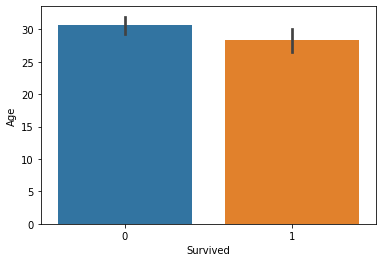

In [11]:
# plot Survived with numerical feature
sns.barplot(x='Survived', y='Age', data=train);

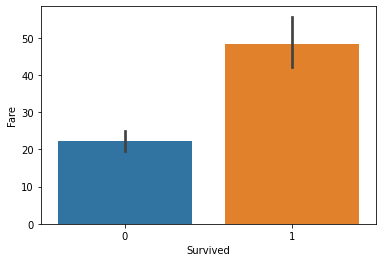

In [12]:
sns.barplot(x='Survived', y='Fare', data=train);

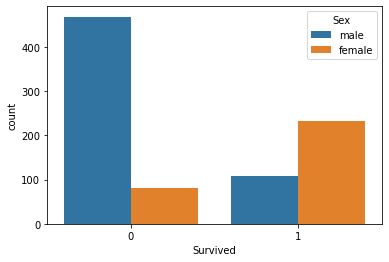

In [13]:
# Survived with categorical column
sns.countplot(x='Survived', hue='Sex', data=train);

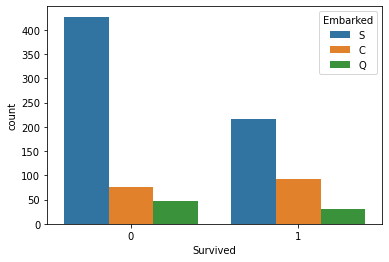

In [14]:
sns.countplot(x='Survived', hue='Embarked', data=train);

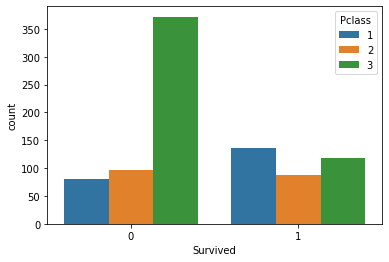

In [15]:
sns.countplot(x='Survived', hue='Pclass', data=train);

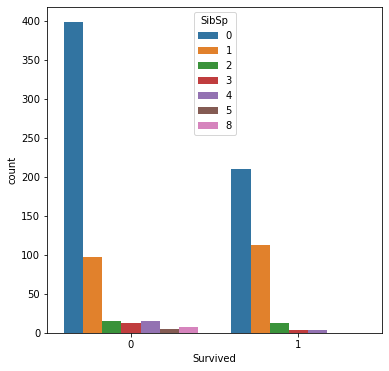

In [16]:
plt.figure(figsize=(6,6))
sns.countplot(x='Survived', hue='SibSp', data=train);

In [17]:
# distribution with column numeric and categorical
col_num = train[['Age','Fare','Parch','SibSp']]
col_cat = train[['Sex','Ticket','Embarked','Cabin']]

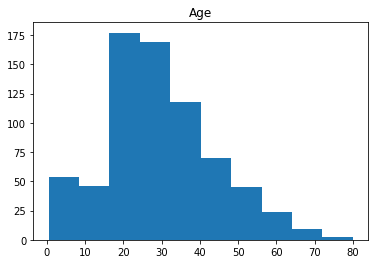

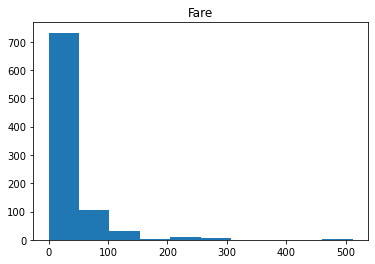

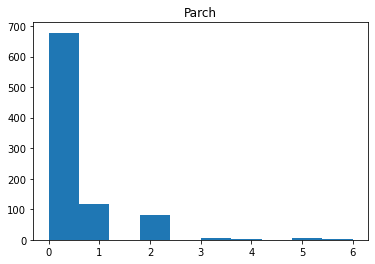

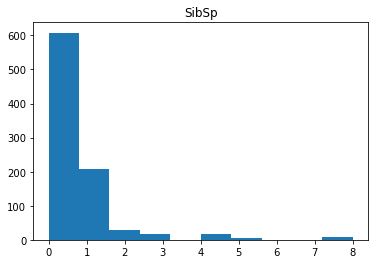

In [18]:
for i in col_num.columns:
    plt.hist(col_num[i])
    plt.title(i)
    plt.show()

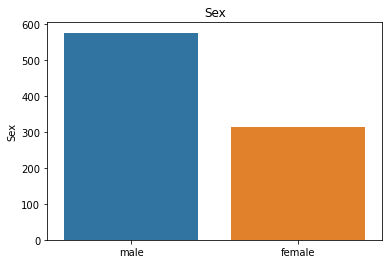

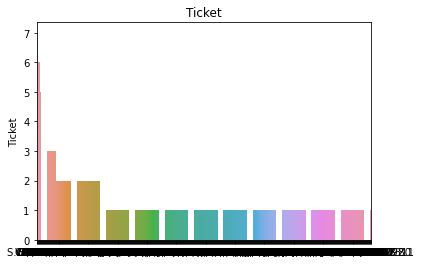

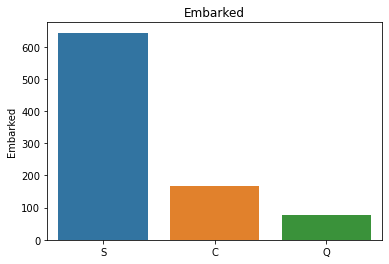

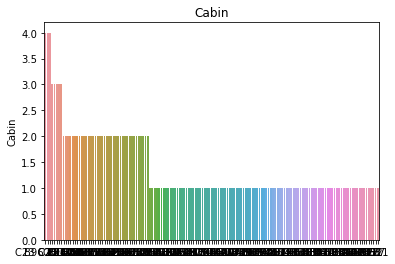

In [19]:
for j in col_cat.columns:
    sns.barplot(col_cat[j].value_counts().index, col_cat[j].value_counts()).set_title(j)
    plt.show()

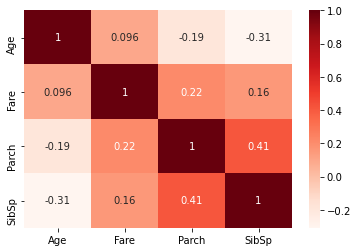

In [20]:
# show the correlation 
sns.heatmap(col_num.corr(), annot=True, cmap='Reds');

## Check missing value

In [21]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Feature Enginnering

In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
# replace title name
dataset = [train, test]

for data in dataset:
    data['title'] = data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [25]:
for mydata in dataset:
    mydata['title'] = mydata['title'].replace(['Lady', 'Countess', 'the Countess', 'Capt', 'Col',\
     'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    mydata['title'] = mydata['title'].replace('Mlle', 'Miss')
    mydata['title'] = mydata['title'].replace('Ms', 'Miss')
    mydata['title'] = mydata['title'].replace('Mme', 'Mrs')

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


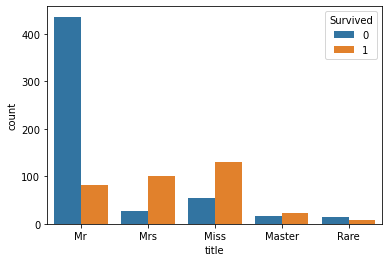

In [27]:
sns.countplot(x='title', hue='Survived', data=train);

In [28]:
# Ticket
tickets = [train, test]
for ti in tickets:
    ti['num_ticket'] = ti.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
    ti['cat_ticket'] = ti.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) > 0 else 0)

In [29]:
# the way to get ticket code
st = 'A/5 21171'
tr =  ''.join(st.split(' ')[:-1]).replace('.','').replace('/','').lower() 
tr
# (x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) > 0 else 0

'a5'

In [30]:
train.num_ticket.value_counts()

1    661
0    230
Name: num_ticket, dtype: int64

In [31]:
test.num_ticket.value_counts()

1    296
0    122
Name: num_ticket, dtype: int64

In [32]:
train.cat_ticket.value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
sopp           3
wep            3
pp             3
sotono2        2
swpp           2
ppp            2
scah           2
sca4           1
fc             1
scow           1
casoton        1
sop            1
as             1
sp             1
fa             1
scahbasle      1
sc             1
Name: cat_ticket, dtype: int64

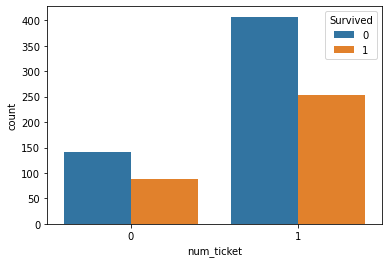

In [33]:
sns.countplot(x='num_ticket', hue='Survived', data=train);

In [34]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,num_ticket,cat_ticket
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,a5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0,pc
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,stono2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,0


In [35]:
# cabin
cabin = [train, test]
for cab in cabin:
    cab['cabin_num'] = cab.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
    cab['cabin_alp'] = cab.Cabin.apply(lambda x: str(x)[0])

In [36]:
train.cabin_num.value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_num, dtype: int64

In [37]:
train.cabin_alp.value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_alp, dtype: int64

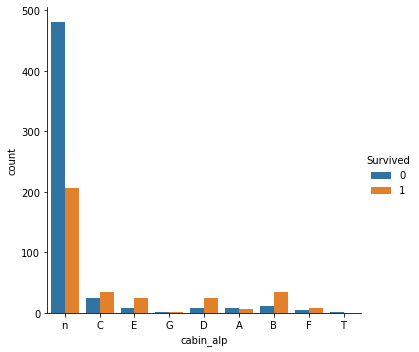

In [38]:
sns.catplot(x='cabin_alp', hue='Survived', kind='count', data=train);

In [39]:
sex_scale = {'male':0, 'female':1}
all_data = [train, test]
for v in all_data:
    v['Sex'] = v['Sex'].map(sex_scale)

In [40]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
title            0
num_ticket       0
cat_ticket       0
cabin_num        0
cabin_alp        0
dtype: int64

In [41]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
title            0
num_ticket       0
cat_ticket       0
cabin_num        0
cabin_alp        0
dtype: int64

## Model building

In [42]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,num_ticket,cat_ticket,cabin_num,cabin_alp
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,a5,0,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0,pc,1,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,stono2,0,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mrs,1,0,1,C
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Mr,1,0,0,n


In [43]:
train.shape

(891, 17)

In [44]:
# fill missing value
age_mean = train.mean()
age_mean_test = test.mean()
fill1 = train['Age'].fillna(train.Age.mean(), inplace=True)
fill2 = test['Age'].fillna(test.Age.mean(), inplace=True)
fill3 = train['Embarked'].fillna('S', inplace=True)
fill4 = test['Embarked'].fillna('S', inplace=True)
fill5 = test['Fare'].fillna(test.Fare.mean(), inplace=True)

In [45]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
title            0
num_ticket       0
cat_ticket       0
cabin_num        0
cabin_alp        0
dtype: int64

In [46]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
title            0
num_ticket       0
cat_ticket       0
cabin_num        0
cabin_alp        0
dtype: int64

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2

# split training and testing data 
feat = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','cabin_alp','title']


X_feat = pd.get_dummies(train[feat])
y_feat = train['Survived']
X_test_feat = pd.get_dummies(test[feat])

X_train, X_test, y_train, y_test = train_test_split(X_feat, y_feat, test_size=0.2, random_state=1)

# feature selection
best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(X_feat, y_feat)
scores = pd.DataFrame(fit.scores_)
col = pd.DataFrame(X_feat.columns)
feature_score = pd.concat([col,scores], axis=1)
feature_score.columns = ['Feature','Score']
print(feature_score.nlargest(10, 'Score'))

        Feature        Score
5          Fare  4518.319091
1           Sex   170.348127
20     title_Mr   112.805785
21    title_Mrs    89.474177
19   title_Miss    79.531749
0        Pclass    30.873699
10  cabin_alp_B    25.875581
2           Age    24.687926
17  cabin_alp_n    20.488314
6    Embarked_C    20.464401


## model building

In [48]:
from sklearn.preprocessing import StandardScaler

X = pd.get_dummies(train[['Fare','Age','SibSp','Parch','Sex']])
y = train['Survived']
X_test_pred = pd.get_dummies(test[['Fare','Age','SibSp','Parch','Sex']])
scale = StandardScaler()
X = scale.fit_transform(X)
X


# split again with new feature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#### build model to predict 

In [49]:
# RandomForestClassifier
model_rfc = RandomForestClassifier(n_estimators=100, bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12)
model_rfc.fit(X_train, y_train)
model_rfc_pred = model_rfc.predict(X_test)
model_rfc_acc = accuracy_score(y_test, model_rfc_pred)
model_rfc_clas = classification_report(y_test, model_rfc_pred)
model_rfc_conf = confusion_matrix(y_test, model_rfc_pred)
model_rfc_result = model_rfc.predict(X_test_pred)
print(f'Accuracy Score RandomForestClassifier: {model_rfc_acc}')
print(f'Classification Report RandomForestClassifier: \n{model_rfc_clas}')
print(f'Confusion Matrix RandomForestClassifier: \n{model_rfc_conf}')

Accuracy Score RandomForestClassifier: 0.7821229050279329
Classification Report RandomForestClassifier: 
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       106
           1       0.83      0.59      0.69        73

    accuracy                           0.78       179
   macro avg       0.80      0.75      0.76       179
weighted avg       0.79      0.78      0.77       179

Confusion Matrix RandomForestClassifier: 
[[97  9]
 [30 43]]


In [50]:
# KNN
model_knn = KNeighborsClassifier(n_neighbors=5, leaf_size=60, n_jobs=-1)
model_knn.fit(X_train, y_train)
model_knn_pred = model_knn.predict(X_test)
model_knn_acc = accuracy_score(y_test, model_knn_pred)
model_knn_clas = classification_report(y_test, model_knn_pred)
model_knn_conf = confusion_matrix(y_test, model_knn_pred)
model_knn_result = model_knn.predict(X_test_pred)
print(f'Accuracy Score KNearestClassifier: {model_knn_acc}')
print(f'Classification Report KNearestClassifier: \n{model_knn_clas}')
print(f'Confusion Matrix KNearestClassifier: \n{model_knn_conf}')

Accuracy Score KNearestClassifier: 0.7374301675977654
Classification Report KNearestClassifier: 
              precision    recall  f1-score   support

           0       0.73      0.89      0.80       106
           1       0.76      0.52      0.62        73

    accuracy                           0.74       179
   macro avg       0.74      0.70      0.71       179
weighted avg       0.74      0.74      0.73       179

Confusion Matrix KNearestClassifier: 
[[94 12]
 [35 38]]


In [66]:
# DecisonTreeClassifer
model_dct = DecisionTreeClassifier(criterion='entropy', max_depth=80, min_samples_leaf=7, min_samples_split=12)
model_dct.fit(X_train, y_train)
model_dct_pred = model_dct.predict(X_test)
model_dct_acc = accuracy_score(y_test, model_dct_pred)
model_dct_clas = classification_report(y_test, model_dct_pred)
model_dct_conf = confusion_matrix(y_test, model_dct_pred)
model_dct_result = model_dct.predict(X_test_pred)
print(f'Accuracy Score DecisonTreeClassifer: {model_dct_acc}')
print(f'Classification Report DecisonTreeClassifer: \n{model_dct_clas}')
print(f'Confusion Matrix DecisonTreeClassifer: \n{model_dct_conf}')

Accuracy Score DecisonTreeClassifer: 0.8044692737430168
Classification Report DecisonTreeClassifer: 
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       106
           1       0.87      0.62      0.72        73

    accuracy                           0.80       179
   macro avg       0.82      0.78      0.78       179
weighted avg       0.81      0.80      0.80       179

Confusion Matrix DecisonTreeClassifer: 
[[99  7]
 [28 45]]


In [52]:
# LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
model_lr_pred = model_lr.predict(X_test)
model_lr_acc = accuracy_score(y_test, model_lr_pred)
model_lr_clas = classification_report(y_test, model_lr_pred)
model_lr_conf = confusion_matrix(y_test, model_lr_pred)
model_lr_result = model_lr.predict(X_test_pred)
print(f'Accuracy Score DecisonTreeClassifer: {model_lr_acc}')
print(f'Classification Report DecisonTreeClassifer: \n{model_lr_clas}')
print(f'Confusion Matrix DecisonTreeClassifer: \n{model_lr_conf}')

Accuracy Score DecisonTreeClassifer: 0.776536312849162
Classification Report DecisonTreeClassifer: 
              precision    recall  f1-score   support

           0       0.78      0.88      0.82       106
           1       0.78      0.63      0.70        73

    accuracy                           0.78       179
   macro avg       0.78      0.75      0.76       179
weighted avg       0.78      0.78      0.77       179

Confusion Matrix DecisonTreeClassifer: 
[[93 13]
 [27 46]]


### chossing best model and best scores using GridSearchCV

In [57]:
model_params = {
    "RandomForestClassifier" : {
        "model" : RandomForestClassifier(),
        "params" : {
            "n_estimators" : [60,80,100],
            "bootstrap" : [True],
            "max_depth" : [60,80,100,120],
            "min_samples_leaf" : [2,3,5,7],
            "min_samples_split" : [10,12,14],
            "max_features" : [2,3,4,5]
        }
    },
    
    "KNeighborsClassifier" : {
        "model" : KNeighborsClassifier(),
        "params" : {
            "n_neighbors" : [2,3,4,5,6],
            "leaf_size" : [50,60,70,80],
            "n_jobs" : [-1,1]
        }
    },
    
    "DecisionTreeClassifier" : {
        "model" : DecisionTreeClassifier(),
        "params" : {
            "criterion" : ['gini','entropy'],
            "max_depth" : [60,70,80,90],
            "min_samples_leaf" : [7,8,9],
            "min_samples_split" : [10,11,12]
        }
    },
    
    "LogisticRegression" : {
        "model" : LogisticRegression(solver='liblinear', multi_class='auto'),
        "params" : {
            "C" : [1,5,10]
        }
    }
}

In [58]:
from sklearn.model_selection import RandomizedSearchCV
scores = []

for model_name, model_par in model_params.items():
    clf = RandomizedSearchCV(model_par['model'], model_par['params'], cv=5, n_iter=3, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model' : model_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })

In [97]:
best = pd.DataFrame(scores, columns=['model','best_score','best_params'])
best

,model,best_score,best_params
0,RandomForestClassifier,0.813316,"{'n_estimators': 80, 'min_samples_split': 14, ..."
1,KNeighborsClassifier,0.810450,"{'n_neighbors': 6, 'n_jobs': -1, 'leaf_size': 70}"
2,DecisionTreeClassifier,0.800621,"{'min_samples_split': 10, 'min_samples_leaf': ..."
3,LogisticRegression,0.790840,{'C': 5}


In [60]:
best.best_params[0]

{'n_estimators': 80,
 'min_samples_split': 14,
 'min_samples_leaf': 3,
 'max_features': 5,
 'max_depth': 100,
 'bootstrap': True}

## Best model performance

In [88]:
# DecisonTreeClassifer
model_dct = DecisionTreeClassifier(criterion='entropy', max_depth=80, min_samples_leaf=7, min_samples_split=12)
model_dct.fit(X_train, y_train)
model_dct_pred = model_dct.predict(X_test)
model_dct_acc = accuracy_score(y_test, model_dct_pred)
model_dct_clas = classification_report(y_test, model_dct_pred)
model_dct_conf = confusion_matrix(y_test, model_dct_pred)
model_dct_result = model_dct.predict(X_test_pred)
print(f'Accuracy Score DecisonTreeClassifer: {model_dct_acc}')
print(f'Classification Report DecisonTreeClassifer: \n{model_dct_clas}')
print(f'Confusion Matrix DecisonTreeClassifer: \n{model_dct_conf}')

Accuracy Score DecisonTreeClassifer: 0.8044692737430168
Classification Report DecisonTreeClassifer: 
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       106
           1       0.87      0.62      0.72        73

    accuracy                           0.80       179
   macro avg       0.82      0.78      0.78       179
weighted avg       0.81      0.80      0.80       179

Confusion Matrix DecisonTreeClassifer: 
[[99  7]
 [28 45]]


In [86]:
# # RandomForestClassifier
# best_performance = RandomForestClassifier(n_estimators=100, bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=5, min_samples_split=14)
# best_performance.fit(X_train, y_train)
# best_performance_pred = best_performance.predict(X_test)
# best_performance_acc = accuracy_score(y_test, best_performance_pred)
# best_performance_clas = classification_report(y_test, best_performance_pred)
# best_performance_conf = confusion_matrix(y_test, best_performance_pred)
# best_performance_result = best_performance.predict(X_test_pred)
# print(f'Accuracy Score Best Performance RandomForestClassifier: {best_performance_acc}')
# print(f'Classification Report Best Performance RandomForestClassifier: \n{best_performance_clas}')
# print(f'Confusion Matrix Best Performance RandomForestClassifier: \n{best_performance_conf}')

In [98]:
model_dct_result

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [99]:
results = pd.DataFrame({'PassengerId':test.PassengerId, 'Survived':model_dct_result})
results

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [100]:
results.Survived.value_counts()

0    263
1    155
Name: Survived, dtype: int64

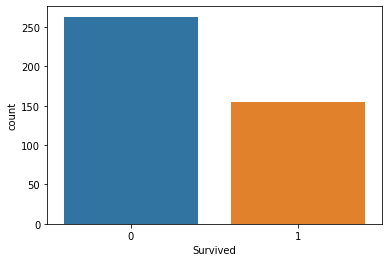

In [102]:
sns.countplot(x='Survived', data=results);